# 3: Mathematical expectation


 #### [Back to main page](https://petrosyan.page/fall2020math3215)


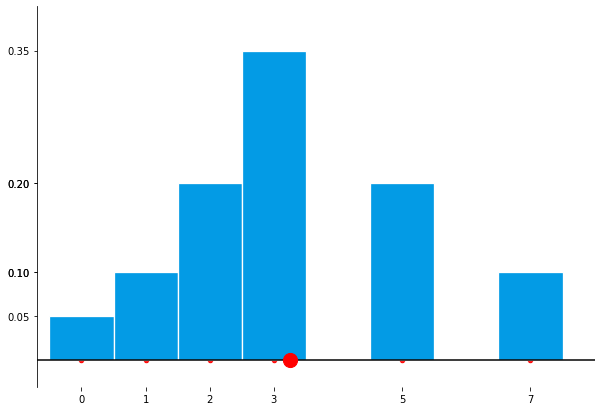

In [1]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10, 7)


range_x = np.array([0, 1, 2, 3, 5, 7])
pmf_values = np.array([1/20, 1/10, 2/10, 7/20, 2/10, 1/10])

fig, ax2 = plt.subplots(num=1, clear=True)


ax2.set_ylim(-0.03, 0.4) 
ax2.set_xlim(-0.7, 8)
ax2.axhline(y=0, color='k')
ax2.set_xticks(range_x)
ax2.set_yticks(pmf_values)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)


# PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
ax2.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
ax2.bar(range_x, pmf_values, width=1, color='#039be5', edgecolor="w", linewidth=1.3, label="Histogran")
 
mean = np.average(range_x, weights=pmf_values)
ax2.scatter(np.array([mean]),np.zeros(1), color ="red", s=200, label="Mean", zorder=3)

plt.show();
                       

### Mean and Variance under linear transformation

**Theorem**

<div class="alert alert-block alert-info">

Suppose $X$ is a random variable with mean $\mu_X$ and standard deviation $\sigma_Y$. Let $Y=aX+b$ where $a$ and $b$ are any two numbers. Then mean and the standard deviation of $Y$ are
$$\mu_Y=a\mu_X+b,\quad \sigma_Y=|a|\sigma_X.$$

</div>    
    
**Proof**
$\mu_Y=E[aX+b]=aE[X]+b=a\mu_X+b.$ Notice that

$$\text{Var}(Y)=E[(Y-E[Y])^2]=E[(aX+b-aE[X]-b)^2]=E[(aX-aE[X])^2]=a^2\text{Var}(X).$$

Taking square roots, we have $\sigma_Y=|a|\sigma_X$. $\blacksquare$


**Example**

Let $X$ be a random variable with $\text{range}(X)=\{-2,-1,0,1,2\}$ and 

$$f_X(-2)=0.4, \quad f_X(-1)=0.25, \quad f_X(0)=0.15, \quad f_X(1)=0.1, \quad f_X(2)=0.1.$$

Take the random variable $Y=2X+1$.Notice that $\text{range}(Y)=\{-3,-1,1,3,5\}$ and 

$$_Y(-3)=0.4, \quad f_Y(-1)=0.25, \quad f_Y(1)=0.15, \quad f_Y(3)=0.1, \quad f_Y(5)=0.1.$$

It can be checked that 

$$\mu_X=-0.75, \quad \sigma_X\approx 1.414$$

and thus 

$$\mu_Y=-0.5, \quad \sigma_Y\approx 2.828.  $$

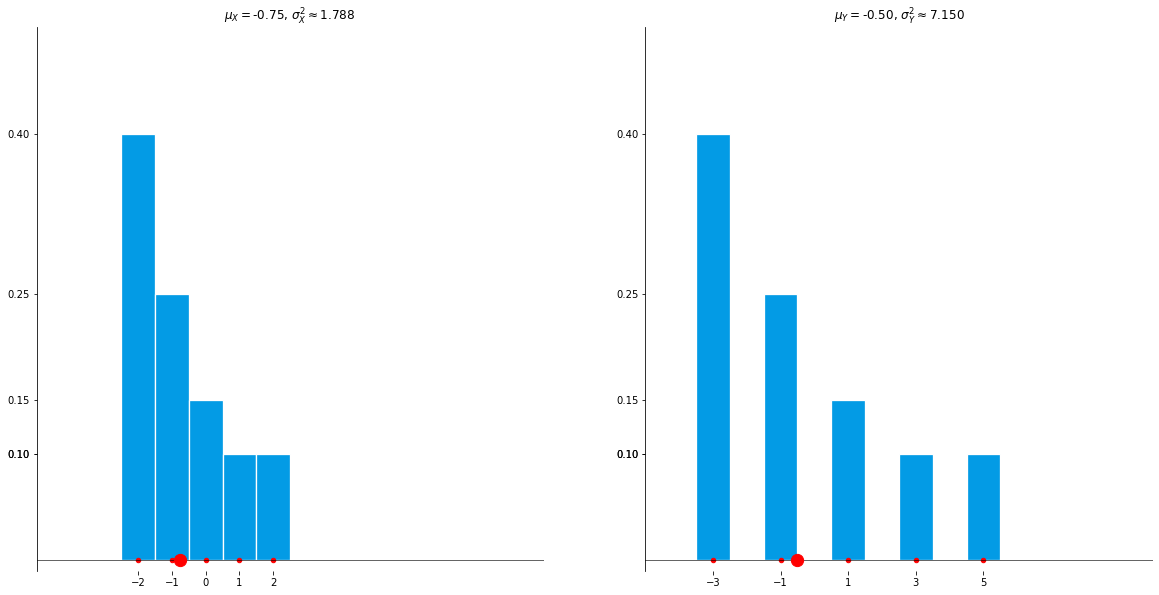

In [7]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10)) 

# values
range_x = np.array([-2,-1,0,1,2])
range_y = np.array([-3,-1,1,3,5])
xpmf_values = np.array([0.4, 0.25, 0.15, 0.1, 0.1])
ypmf_values = np.array([0.4, 0.25, 0.15, 0.1, 0.1])

# mean  
mean_x = np.average(range_x, weights = xpmf_values)
mean_y = np.average(range_y, weights = ypmf_values)

# variance
mean_x2 = np.average(np.power(range_x,2), weights = xpmf_values)
mean_y2 = np.average(np.power(range_y,2), weights = ypmf_values)
var_x = mean_x2 - mean_x**2
var_y = mean_y2 - mean_y**2

# set up the figure
fig, [ax1, ax2] = plt.subplots(1,2, num=1, clear=True)

ax1.set_ylim(-0.01,0.5) 
ax1.set_xlim(-5, 10)
ax1.axhline(y=0, color='k', linewidth = 0.6)
ax1.set_xticks(range_x)
ax1.set_yticks(xpmf_values)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2.set_ylim(-0.01, 0.5) 
ax2.set_xlim(-5, 10)
ax2.axhline(y=0, color='k', linewidth = 0.6)
ax2.set_xticks(range_y)
ax2.set_yticks(ypmf_values)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

# 
ax1.scatter(np.array([mean_x]),np.zeros(1), color ="red", s=150, zorder=3)
ax1.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20, zorder=2)
ax1.bar(range_x, xpmf_values, width=1, color='#039be5', edgecolor="w", linewidth=1.3, zorder=1)
ax1.set_title(r"$\mu_X=${:.2f}, $\sigma^2_X\approx${:.3f}".format(mean_x, var_x))


# 
ax2.scatter(np.array([mean_y]),np.zeros(1), color ="red", s=150, zorder=3)
ax2.scatter(range_y,np.zeros(range_y.shape), color ="red", s=20, zorder=2)
ax2.bar(range_y, ypmf_values, width=1, color='#039be5', edgecolor="w", linewidth=1.3, zorder=1)
ax2.set_title(r"$\mu_Y=${:.2f}, $\sigma^2_Y\approx${:.3f}".format(mean_y, var_y))

plt.show();


### Negative binomial distribution


**Definition**

<div class="alert alert-block alert-info">

Let $X$ be the number of independent Bernoulli trials with success probability $p$ needed until exactly r successes occur. Then we say $X$ has the **negative binomial distribution** with parameters $(r,p)$.
</div>


* $\text{range}(X)=\{r,r+1,\dots\}.$
*If $X(s)=x$, means there are $r-1$ successes and $x-r$ fails in the first $x-1$ trials and the $x-th $ trial is a success. Therefore

$$f(x)={x-1\choose r-1}p^{r}q^{x-r}.$$

* When $r=1$, the negative binomial distribution is the same as the geometric distribution. 

In [9]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider, IntSlider
from scipy.special import comb

def negbinomial_pmf(r, p):
    q = 1-p
    N=100
    range_x = np.arange(r, N, 1)

    def negbin_pmf(x):
        pmf_val = comb(x-1, r-1, exact=True) * p**r * q**(x-r)
        return pmf_val
    mean = r/p

    pmf_values = np.array([negbin_pmf(x) for x in range_x])

    # plot setup
    plt.figure(figsize=(14,7)) 
    plt.axhline(y=0, color='k', linewidth = 0.6)
    plt.ylim(-0.01, max(np.max(pmf_values)+0.05, 0.1))
    plt.xlim(np.min(range_x)-2, N+1)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    # PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
    plt.scatter(np.array([mean]),np.zeros(1), color ="red", s=200,zorder=3)
    plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20, zorder=2)
    plt.bar(range_x, pmf_values,width=1, color='#039be5', edgecolor="w", linewidth=1.3, zorder=1)
    plt.title("Negative binomial distribution")
    plt.figtext(0.8,0.8, " r={} \n p={} ".format(r,p), ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.plot();

# create interactive variables
r = IntSlider(min=1, max=50, step=1, value=30, readout_format='')
p = FloatSlider(min=0.01, max=1, step=0.01, value=0.5, readout_format='')

# display the interactive plot
interact(negbinomial_pmf, r=r, p=p);

interactive(children=(IntSlider(value=30, description='r', max=50, min=1, readout_format=''), FloatSlider(valu…

### Poisson distribution


**Definition**

<div class="alert alert-block alert-info">

A discrete random variable has Poisson distribution with parameter $\lambda>0$ if 

$$\text{range}(X)=\{0,1,2,3,\dots\}$$

and 

$$f(x)=\frac{e^{-\lambda}\lambda^x}{x!},\quad x\in\text{range}(X).$$

$\lambda$ is called the **expected rate**.
</div>

 Notice that $f(x)$ is indeed a pmf:
 
$$\sum_{x\in \text{range}(X)}f(x)=\sum_{x=0}^\infty \frac{e^{-\lambda}\lambda^x}{x!}=e^{-\lambda} \sum_{x=0}^\infty \frac{\lambda^x}{x!}=e^{-\lambda}e^{\lambda}=1.$$


In [11]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial
from ipywidgets import interact, FloatSlider


def poisson_pmf(lam):
    N=50
    range_x = np.arange(0, N, 1)

    def poiss_pmf(x):
        pmf_val = np.exp(-lam) * np.power(lam, x) / factorial(x)
        return pmf_val
    mean = lam

    pmf_values = np.array([poiss_pmf(x) for x in range_x])

    # plot setup
    plt.figure(figsize=(14,7)) 
    plt.axhline(y=0, color='k', linewidth = 0.6)
    plt.ylim(-0.01, max(np.max(pmf_values)+0.05, 0.1))
    plt.xlim(0, N+1)
    plt.xticks(np.arange(0, N+1, 5))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    # PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
    plt.scatter(np.array([mean]),np.zeros(1), color ="red", s=200, zorder=3)
    plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20, zorder=2)
    plt.bar(range_x, pmf_values, width=1, color='#039be5', edgecolor="w", linewidth=1.3, zorder=1)
    plt.title("Poisson distribution")
    plt.figtext(0.8,0.8, r"$\lambda$={}".format(lam), ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.plot();

# create interactive variables
lam = FloatSlider(min=0.0, max=100, step=0.5, value=6, readout_format='', description=r"$\lambda$")

# display the interactive plot
interact(poisson_pmf, lam=lam);

interactive(children=(FloatSlider(value=6.0, description='$\\lambda$', readout_format='', step=0.5), Output())…

#### Motivation 

The Poisson distribution arises in the following way (made up scenario): grocery route bus can arrive every $\frac{1}{n}$ hour. It is a very unpredictable bus but we know that there are on average $\lambda$ buses arriving every hour. Assuming whether a bus arrives or not at given time  is independent from  other times, this becomes a binomial distribution with parameter $p=\frac{\lambda}{n}$. We know that the expect number of successes in a binomial distribution with parameters $(n,p)$ is $np$ and so $p=\frac{\lambda}{n}$. Therefore, the probability of $x$ number of buses arriving in an hour will be

$$f(x)={n\choose x}p^x(1-p)^{n-x}={n\choose x}\left(\frac{\lambda}{n}\right)^x\left(1-\frac{\lambda}{n}\right)^{n-x},\quad x=0,1,2,\dots, n. $$

* Now imagine the bus starts arriving at more irregular times. To accommodate that we can increase the $n$. 
* When $n\to \infty$ that will correspond to the buses potentially arriving at any moment in the continuous interval. 
* In that case

$$f(x)=\lim_{n\to \infty}{n\choose x}\left(\frac{\lambda}{n}\right)^x\left(1-\frac{\lambda}{n}\right)^{n-x}, \quad x=0,1,2,\dots.$$

To compute this limit notice that 

$$\lim_{n\to \infty}{n\choose x}\left(\frac{\lambda}{n}\right)^x=\frac{\lambda^x}{x!}\lim_{n\to \infty}\frac{n(n-1)\cdots (n-x+1)}{•n^x}=\frac{\lambda^x}{x!}$$

and (you should know this from calculus)

$$\lim_{n\to \infty}\left(1-\frac{\lambda}{n}\right)^{n-x}=e^{-\lambda}.$$

Consequently, if the buses can potentially arrive any moment within the hour, with $\lambda$ buses arriving in average  at every hour, then the probability that $x$ buses will arrive in a given hour is 
$$f(x)=\frac{e^{-\lambda}\lambda^x}{x!},\quad x=0,1,2,\dots.$$



In [15]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb, factorial
from ipywidgets import interact, IntSlider, FloatSlider

def poiss_binom_pmf(n, lam):
    p = lam/n
    q = 1-p
    N = 50
    brange_x = np.arange(0, n, 1)
    prange_x = np.arange(0, N, 1)

    def poiss_pmf(x):
        pmf_val = np.exp(-lam) * np.power(lam, x) / factorial(x)
        return pmf_val
    mean = lam

    ppmf_values = np.array([poiss_pmf(x) for x in prange_x])
    
    def binom_pmf(x):
        pmf_val = comb(n, x, exact=True) * p**x * q**(n-x)
        return pmf_val
    mean = n*p

    bpmf_values = np.array([binom_pmf(x) for x in brange_x])

    # plot setup
    plt.figure(figsize=(14,7)) 
    plt.axhline(y=0, color='k', linewidth = 0.6)
    plt.xlim(-2,20)

    # Plotting hypergeometric
    plt.bar(prange_x, ppmf_values, width=1, color=(0.1, 0.1, 1, 0.1), edgecolor='blue', 
            linewidth=1.3, label="Poisson")
    
    # Plotting binomial
    plt.bar(brange_x, bpmf_values, width=1, color=(0.3, 0.5, 0.3, 0.1), edgecolor='green',
            linewidth=1.3, label="Binomial")
    plt.figtext(0.83,0.75, r" $\lambda$={}".format(lam)+"\n n = {}".format(n), ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend()
    plt.plot();

# create interactive variables
lam = FloatSlider(min=0.0, max=100, step=0.5, value=5, readout_format='', description=r"$\lambda$")
n = IntSlider(min=np.floor(lam.value)+1, max=200, step=1, value=100, readout_format='')

# enforce K<=N and n<=N
def update_range(*args):
    n.min = np.floor(lam.value)+1
    
lam.observe(update_range, 'value')

# display the interactive plot
interact(poiss_binom_pmf,  lam=lam, n=n);

interactive(children=(IntSlider(value=100, description='n', max=200, min=6, readout_format=''), FloatSlider(va…

Let us see that the Poisson distribution with parameter $\lambda$ and the binomial distribution with parameters $(n,p=\frac{\lambda}{n})$ are close to each other  when $n$ is large by looking at their histograms.
